# Curve fitting though Backpropagation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
n = 300
x = np.random.uniform(low=0, high=1, size=[n])
v = np.random.uniform(low=-0.1, high=0.1, size=[n])
learning_rate = 3

In [39]:
mse_arr = []
epoch = 0

In [40]:
d = np.sin(20*x) + 3*x + v

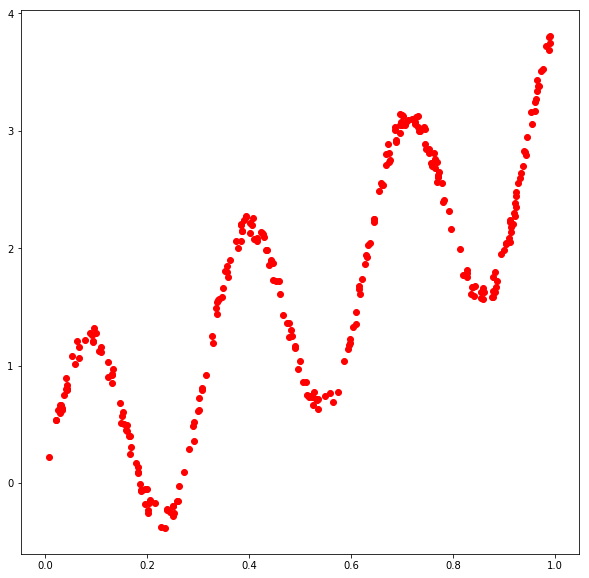

In [41]:
plt.figure(figsize=(10,10))
plt.scatter(x,d,c='r')

In [42]:
def out_act_func(p):
    return p

In [43]:
def hid_act_func(p):
    return np.tanh(p)

In [44]:
def deri_hid_func(p):
    return (1 - np.tanh(p)**2)

In [45]:
def deri_out_func(p):
    return 1

In [46]:
w1 = np.random.uniform(low=-5, high=5, size=[24])
b1 = np.random.uniform(low=-1, high=1, size=[24])
w2 = np.random.uniform(low=-5, high=5, size=[24])
b2 = np.random.uniform(low=-1, high=1, size=[1])

In [47]:
while True:
    y = []
    for i in range(len(x)):
        a = x[i] * w1 + b1
        b = hid_act_func(a)
        y.append((out_act_func(np.matmul(w2, b) + b2))[0])
        temp = -(d[i] - y[i])*2
        err = (temp * learning_rate)/len(x)
        w1_grad = err * x[i] * w2 * deri_hid_func(a) 
        b1_grad = err * w2 * deri_hid_func(a)
        w2_grad = err * b
        b2_grad = -err
        
        w1 = np.subtract(w1, np.asarray(w1_grad))
        w2 = np.subtract(w2, np.asarray(w2_grad))
        b1 = np.subtract(b1, np.asarray(b1_grad))
        b2 = np.subtract(b2, np.asarray(b2_grad))
        
    min_serror = 0
    for i in range(len(x)):
        min_serror += (d[i] - y[i])**2
    min_serror /= len(x)
    mse_arr.append(min_serror)
    
    if mse_arr[epoch] >= mse_arr[epoch - 1]:
        learning_rate = 0.9 * learning_rate
    if mse_arr[-1] < 0.01:
        break
    epoch += 1
        
        
        

In [48]:
epoch

1260

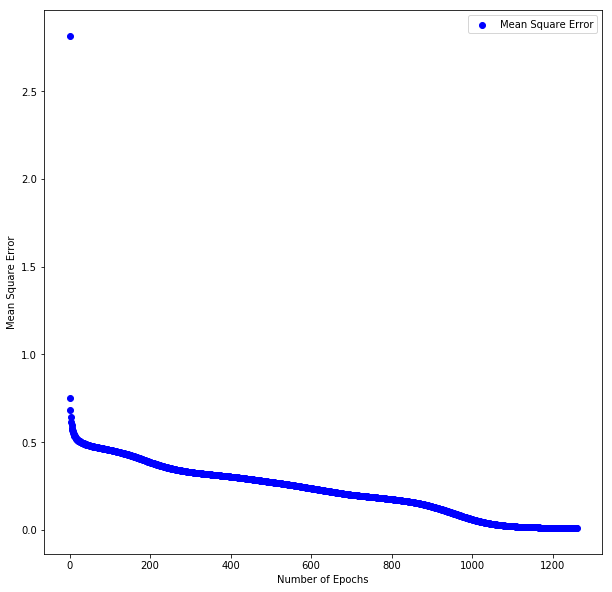

In [49]:
fig, ax = plt.subplots(figsize=(10,10))
plt.ylabel('Mean Square Error')
plt.xlabel('Number of Epochs')
plt.scatter(range(len(mse_arr)), mse_arr, c = 'blue', label = 'Mean Square Error')
plt.legend()
plt.show()

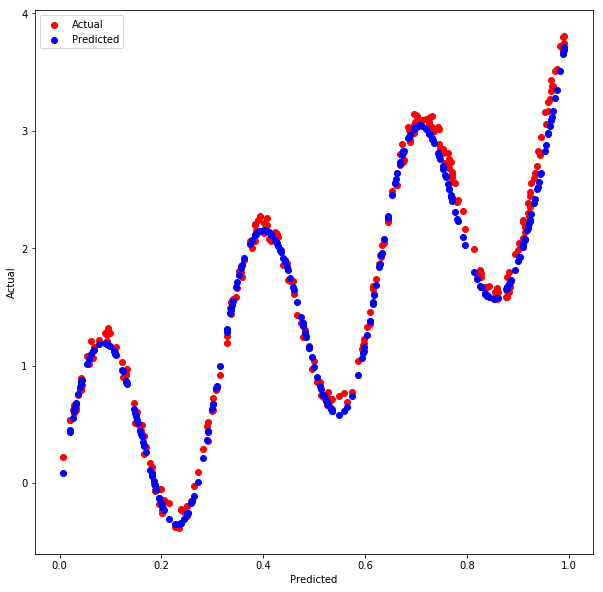

In [50]:
y = []
for i in range(len(x)):
        y1 = []
        a = x[i] * w1 + b1
        b = hid_act_func(a)
        y1.append(b)
        y.append((out_act_func(np.matmul(w2, b) + b2))[0])

fig, ax = plt.subplots(figsize=(10,10))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.scatter(x,d, c = 'red', label = 'Actual')
plt.scatter(x,y, c = 'blue', label = 'Predicted')
plt.legend()
plt.show()